# Лабораторная работа

Баллы за секции:
- *Задание 1* - 10 баллов
- *Задание 2* - 20 баллов
- *Задание 3* - 30 баллов
- **Итого** - 60 баллов

Оценка за лабу $ = \frac{score}{6}$

## Внимание! Attention! Achtung!

**Данная лабораторная работа является блокирующей**, т.е. если лабораторная работа не выполнена, то оценка за курс - неуд.

Лабораторная работа считается выполненной, если **за каждое из заданий получено не менее 2 баллов**.

## Формат сдачи лабораторной работы

Данная лабораторная работа сдается так же, как и проект - заполняете данный ноутбук, отправляете его через GitHub с указанием проверяющего.

**Ассистенты не будут запускать ячейки кода, а смотреть на выведенный результат и код. Если ячейка кода не запущена - балл не ставится, даже при правильно написанном коде.**

***(Комментарии что курс по Python легче чем по C++ учтены)***

>**Примечание**
>
>Данные задания вдохновлены предметом "Введение в анализ данных" 2 курса, по итогу которого идёт отбор на DS-поток. Если вы видите себя в смежных областях, советуем выполнить данную лабораторку по максимуму.

In [1]:
# Всё необходимое для выполнения данной лабораторной работы!
import requests
from time import sleep

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gp
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import sklearn as skl

## Задание 1. Парсинг - 10 баллов

В этом задании Вам предстоит работать с API сайта <a target="_blank" href="hh.ru">hh.ru</a>. Документация доступна по <a target="_blank" href="https://github.com/hhru/api/blob/master/docs/vacancies.md#search">ссылке</a>.

<b><font color="red">Внимание!</font> При работе с API не забывайте делать паузы между запросами, иначе вас забанят. Просрочка дедлайна по этой причине не принимается!</b>

**Задача:**
1. выбрать 5 интересующих вас профессий (не смежных, т.е. Аналатик и Data Engineer не считается корректным)
2. затем получить доступные по данным профессиям вакансии в Москве и выделить их физические координаты
3. нанести полученные координаты на карту местоположения компаний

*Пример запроса для профессии:*

In [2]:
URL = 'https://api.hh.ru/vacancies'

params = {
    'text': "Разнорабочий",
    'area': 1,
    'page': 0,
    'per_page': 50
}

data = requests.get(URL, params).json()

Если Ваш запрос прошел успешно, то вы получите следующие ключи (значения данных ключей вы найдете по ссылке на документацию):

In [3]:
data.keys()

dict_keys(['items', 'found', 'pages', 'page', 'per_page', 'clusters', 'arguments', 'fixes', 'suggests', 'alternate_url'])

In [4]:
data

{'items': [{'id': '88565123',
   'premium': False,
   'name': 'Разнорабочий в аэропорт',
   'department': None,
   'has_test': False,
   'response_letter_required': False,
   'area': {'id': '1', 'name': 'Москва', 'url': 'https://api.hh.ru/areas/1'},
   'salary': {'from': None, 'to': 408000, 'currency': 'RUR', 'gross': False},
   'type': {'id': 'open', 'name': 'Открытая'},
   'address': {'city': None,
    'street': None,
    'building': None,
    'lat': None,
    'lng': None,
    'description': None,
    'raw': None,
    'metro': {'station_name': 'Некрасовка',
     'line_name': 'Некрасовская',
     'station_id': '98.641',
     'line_id': '98',
     'lat': 55.7029,
     'lng': 37.9264},
    'metro_stations': [{'station_name': 'Некрасовка',
      'line_name': 'Некрасовская',
      'station_id': '98.641',
      'line_id': '98',
      'lat': 55.7029,
      'lng': 37.9264}],
    'id': '11674741'},
   'response_url': None,
   'sort_point_distance': None,
   'published_at': '2024-05-03T11:17:3

>**Примечание**
>
>В `data['pages']` будет хранится количество найденных страниц вакансий - для корректного сбора данных Вам нужно пробежать по **КАЖДОЙ** странице и сделать соотвествующие запросы.

>**Совет**
>
>Посмотрите что хранится в `items`!

(1 балл) Выберете для нас 5 наиболее интересных специальностей и получите по ним имеющиеся вакансии:

In [5]:
URL = 'https://api.hh.ru/vacancies'

req_per_page = 100

jobs = ["Разнорабочий",
        "Учитель информатики",
        "Менеджер продаж",
        "Водитель автобуса",
        "Data Scientist"]

result = []

ans = 0

for job in jobs:
  params = {
    'text': job,
    'area': 1,
    'page': 0,
    'per_page': req_per_page
  }
  data = requests.get(URL, params).json()
  result.append(data)
  ans += data["found"]
  sleep(1)
  print(f"Вакансий по профессии {job}: " + str(data["found"]))

Вакансий по профессии Разнорабочий: 2606
Вакансий по профессии Учитель информатики: 119
Вакансий по профессии Менеджер продаж: 21315
Вакансий по профессии Водитель автобуса: 285
Вакансий по профессии Data Scientist: 365


(1 балл) Посчитайте сколько всего найдено вакансий:

In [6]:
print(f"Всего найдено вакансий {ans}")

Всего найдено вакансий 24690


(1 балл) Создайте структуру данных, которая будет хранить в себе имя компании и ее координаты (широта и долгота):

In [7]:
class Company:
    def __init__(self, name : str, x : int = None, y : int = None):
      self.name = name
      self.lat = x
      self.lng = y

    def __repr__(self):
      return f"Company : {self.name}, coordinates = [{self.lat}, {self.lng}]"

    def __eq__(self, other):
        return self.name == other.name and self.lat == other.lat and self.lng == other.lng


(1 балл) Создайте экземпляр этой структуры данных для каждой компании, которая выставила вакансию:

In [8]:
companies = []

clear = 0
all = 0
double = 0

for i,data in enumerate(result):
  job_company = []
  print(f"Профессия: {jobs[i]}")
  req = 0
  for page in range(data["pages"]):
    print(f"Searching page: {page}")
    sleep(1)
    params = {
    'text': jobs[i],
    'area': 1,
    'page': page,
    'per_page': req_per_page
    }
    data = requests.get(URL, params).json()

    for item in data["items"]:
      req += 1
      coordinates = [item["address"]["lat"],item["address"]["lng"]] if item["address"] is not None else [None, None];
      new_company = Company(item["employer"]["name"], coordinates[0], coordinates[1])
      all += 1
      if (item["address"] == None):
        clear += 1
      if new_company not in job_company:
        job_company.append(new_company)
        #print(new_company)
      else:
        #print(f"This company is already in list: {new_company}")
        double += 1;

  companies.append(job_company)


  print(f"Количество уникальных компаний: {len(companies)}\nПовторились {double} компаний")
  print(f"По данной профессии нашлось столько вакансий: {req}\n\n")



Профессия: Разнорабочий
Searching page: 0
Searching page: 1
Searching page: 2
Searching page: 3
Searching page: 4
Searching page: 5
Searching page: 6
Searching page: 7
Searching page: 8
Searching page: 9
Searching page: 10
Searching page: 11
Searching page: 12
Searching page: 13
Searching page: 14
Searching page: 15
Searching page: 16
Searching page: 17
Searching page: 18
Searching page: 19
Количество уникальных компаний: 1
Повторились 679 компаний
По данной профессии нашлось столько вакансий: 2000


Профессия: Учитель информатики
Searching page: 0
Searching page: 1
Количество уникальных компаний: 2
Повторились 707 компаний
По данной профессии нашлось столько вакансий: 119


Профессия: Менеджер продаж
Searching page: 0
Searching page: 1
Searching page: 2
Searching page: 3
Searching page: 4
Searching page: 5
Searching page: 6
Searching page: 7
Searching page: 8
Searching page: 9
Searching page: 10
Searching page: 11
Searching page: 12
Searching page: 13
Searching page: 14
Searching page

In [9]:
for job in companies:
  for company in job:
    print(company)

Company : Брайт, coordinates = [None, None]
Company : Велком, coordinates = [None, None]
Company : МЕГАПАРК, coordinates = [55.772912, 37.707979]
Company : Департамент Ф53, coordinates = [None, None]
Company : М Партс, coordinates = [55.618649, 37.506541]
Company : Rezerv, coordinates = [None, None]
Company : Работа.Про, coordinates = [None, None]
Company : Фёсти, coordinates = [None, None]
Company : Гринити Гарант, coordinates = [53.888069, 37.575702]
Company : Москва-Работа, coordinates = [55.621816, 37.424057]
Company : Москва-Работа, coordinates = [None, None]
Company : Спецпромстрой, coordinates = [55.741267, 37.62563]
Company : Строительная Компания Гарант, coordinates = [55.78686, 37.614518]
Company : ФГБУ НИИР, coordinates = [55.762676, 37.664725]
Company : Журавлев Александр Сергеевич, coordinates = [None, None]
Company : ГК Альянс, coordinates = [None, None]
Company : Никс, coordinates = [55.912077, 37.590003]
Company : ОКО Стиль, coordinates = [55.74689164336257, 37.45646570

(1 балл) Найдите количество вакансий, у которых заданы координаты (значения данных может быть пустым):

In [10]:
print(all - clear)
print("Настолько мало, потому что APi почему-то не дает получить страницы, большие 20")

3061
Настолько мало, потому что APi почему-то не дает получить страницы, большие 20


(1 балл) Отберите вакансии, которые расположены в пределах МКАД (можно грубо):

In [11]:
mkad = []

left = 37.344287
right = 37.879998
down = 55.545493
up = 55.931762

result = 0

for job in companies:
  companies = []
  for company in job:
    if company.lat != None and company.lng != None:
      if down <= company.lat <= up and left <= company.lng <= right:
        companies.append(company)
  mkad.append(companies)
  result += len(companies)


print(result)

2103


(1 балл) Постройте график в координатах "широта-долгота" для отображения вакансий внутри МКАД (не забывайте прописать прозрачность, чтобы увидеть скопления):

<ipython-input-12-d8513651ce20>:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x, y, c=(1,0,0, 0.2))


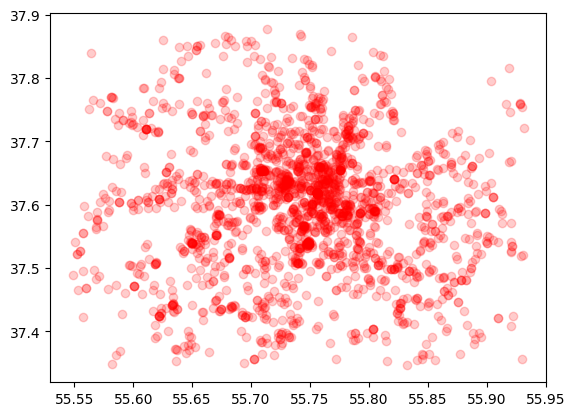

In [12]:
x = []
y = []
name = []

for job in mkad:
  for company in job:
    x.append(company.lat)
    y.append(company.lng)
    name.append(company.name)

city = ["Moscow"] * len(x)
plt.scatter(x, y, c=(1,0,0, 0.2))
plt.show()

(1 балл) Нанесите все точки вакансий на карту (для этого вам поможет данная <a target="_blank" href="https://plotly.com/python/mapbox-layers/">документации</a>, не забудьте про прозрачность и центрирование по Москве):

In [13]:
print(x)
print(y)

[55.772912, 55.618649, 55.621816, 55.741267, 55.78686, 55.762676, 55.912077, 55.74689164336257, 55.828925, 55.623117, 55.721848, 55.850843, 55.759755, 55.755864, 55.82577, 55.884434, 55.79018, 55.788226, 55.717614, 55.780568708388046, 55.75576800652564, 55.800595, 55.761457, 55.764794, 55.803322, 55.70005, 55.755864, 55.777358, 55.640609, 55.82485, 55.729696, 55.918953, 55.643424, 55.71843, 55.826898, 55.756584, 55.775707, 55.710362, 55.78169947357957, 55.75207, 55.805417, 55.822883, 55.669625, 55.717792, 55.800559, 55.66729, 55.708922, 55.732595, 55.708922, 55.758468, 55.67058, 55.745392, 55.617032, 55.65724, 55.776684, 55.73588, 55.650439, 55.704002, 55.76213, 55.768329, 55.776618, 55.739549, 55.665685, 55.82824612109404, 55.863899, 55.582253, 55.758468, 55.744622, 55.792807, 55.681681, 55.816016418931575, 55.704098, 55.703038, 55.803363, 55.619483, 55.594224, 55.632733, 55.756994, 55.59155757461166, 55.776451, 55.790954, 55.757009, 55.771879, 55.758215, 55.674489, 55.764759, 55.7520

In [14]:
data = {'type': ["Company"] * len(x),
        'name':name}
df = pd.DataFrame(data)
wkts = []
for index in range(len(x)):
  wkts.append(f"Point ({y[index]} {x[index]})")
geom = gp.GeoSeries.from_wkt(wkts)
geom = geom.set_crs(4326)
geodf = gp.GeoDataFrame(data = df, geometry = geom)

In [15]:
!pip install mapclassify

In [16]:
geodf.explore(max_zoom = 11)

(2 балла) **Сделайте выводы о проделанной работе:**

>*Подсказки для маленьких: Что вы можете сказать про районы Москвы? Что вы можете сказать про зарплаты? Что вы можете сказать про спрос?*

Мы проанализировали данные по 5 непересекаемым профессиям.

Исходя из полученных данных, можно сказать, что учителя информатики требуются во всех районах Москвы.

Наибольшее количество вакансий расположено в центре Москвы. Это и не удивительно, наибольшее количество вакансий по профессии "Менеджер продаж".

Зарплаты увеличиваются по мере приближения к центру Москвы.

Спрос оценить по данным вакансиям сложно. Если вакансий более 20000, то скорее всего спрос огромный, а предложений не хватает.

В центре Москвы требуется больше квалифицированных рабочих

## Задание 2. Анализ данных - 20 баллов

Вам предстоит проанализировать датасет, содержащий информацию об бриллианта, их стоимости и остальных характеристиках.



Поясним значения хранящиеся в колонках:
*   `cut` - огранка бриллианта (относится к одной из примерно 10 наиболее распространенных)
*   `color` - цвет бриллианта, прозрачные бриллианты имеют градацию `D-Z`, "более высокие" буквы - более желтоватые, но часто имеют лучшие значения, поскольку цвет трудно определить один раз в кольце
*   `clarity` - чистота бриллианта, наличие включений (внутренних дефектов), чем меньше и мельче, тем лучше
*   `carat_weight` - масса бриллианта (слабо связана с размером бриллианта, т.к. огранка и качество огранки, как правило, играют большую роль)
*   `cut_quality` - качество ограники по системе оценки GIA Cut
*   `lab` - лаборатория оценивания
*   `meas_length` - длина бриллианта
*   `meas_width` - ширина бриллианта
*   `meas_depth` - глубина бриллианта
*   `total_sales_price` - цена бриллианта в долларах.
*    **и прочие колонки**

Скачаем данные:

In [17]:
!gdown 10OJ30qlkE-7zK4JuVTDMY3U4nRB4tu_8

Downloading...
From: https://drive.google.com/uc?id=10OJ30qlkE-7zK4JuVTDMY3U4nRB4tu_8
To: /content/diamonds.csv
100% 35.4M/35.4M [00:00<00:00, 90.5MB/s]


Создадим DataFrame:

In [18]:
diamonds = pd.read_csv("diamonds.csv")

(0.5 балла) Выведете первые 5 строк датасета:

In [19]:
diamonds.head(5)

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.79,M,M,unknown,NaN,unknown,unknown,unknown,unknown,200
1,1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,...,1.78,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.77,TN,M,unknown,NaN,unknown,unknown,unknown,unknown,200
3,3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.78,M,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,...,1.82,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200


(0.5 балла) Найдите количество бриллиантов всего в данном датасете:

In [20]:
diamonds.shape[0]

219703

(0.5 балла) Выведите максимальную и минимальную цену бриллианта в формате `номер - цена`:

In [21]:
min_cost = diamonds["total_sales_price"].min()
max_cost = diamonds["total_sales_price"].max()

for index,row in diamonds.iterrows():
  if row["total_sales_price"] == min_cost:
    print(f"{index} - {min_cost}")
    break

for index,row in diamonds.iterrows():
  if row["total_sales_price"] == max_cost:
    print(f"{index} - {max_cost}")
    break

0 - 200
219702 - 1449881


(1 балл) Посчитайте количество пропусков (пропуском считается значение `unknown` или `None`):

In [22]:
has_none = []
columns = []
all_col = []
ans = 0
for i,row in enumerate(list(diamonds.columns.values)):
  if 1:
    all_col.append(row)
    result = diamonds[diamonds[row] == "unknown"].shape[0]
    result += diamonds.isnull().sum()[i]
    has_none.append(result)
    ans += result
    columns.append(row)

print(ans)

1891168


In [23]:
diamonds.isnull().sum().sum()

145141

(1 балл) Найдите в каких столбцах присутствуют пропуски:

In [24]:
for col in columns:
  print(col)

Unnamed: 0
cut
color
clarity
carat_weight
cut_quality
lab
symmetry
polish
eye_clean
culet_size
culet_condition
depth_percent
table_percent
meas_length
meas_width
meas_depth
girdle_min
girdle_max
fluor_color
fluor_intensity
fancy_color_dominant_color
fancy_color_secondary_color
fancy_color_overtone
fancy_color_intensity
total_sales_price


В нашем датасете присутствуют колонки, которые начинаются с `fancy_color_` или `fluor_`. Большинство значений в этих колонках - `unknown` или `None`, поэтому мы считаем их малоинформативными.

Ваша задача:

1. (0.5 балла) найти количество таких колонок, которые начинаются с `fancy_color_` или `fluor_`:

In [25]:
ans = 0
bad_col = []
for col in all_col:
  if col.startswith("fancy_color_") > 0 or col.startswith("fluor_") > 0:
    ans += 1
    bad_col.append(col)
print(ans)

6


2. (0.5 балла) найти количество информативных (не `None` или `unknown`) значений в этих колонках:

In [26]:
for i,row in enumerate(bad_col):
  if 1:
    result = diamonds[diamonds[row] == "unknown"].shape[0]
    result += diamonds[row].isnull().sum()
    print(f"{row} - {result}")

fluor_color - 203977
fluor_intensity - 143619
fancy_color_dominant_color - 210539
fancy_color_secondary_color - 218641
fancy_color_overtone - 219315
fancy_color_intensity - 210541


3. (0.5 балла) удалить данные колонки из датасета, сохранив изменения (в дальнейшем работаем измененным датасетом):

In [27]:
diamonds = diamonds.drop(columns = bad_col)

(1 балл) Проделайте тоже самое для колонок, начинающихся с `culet_`:

In [28]:
ans = 0
bad_col = []
for col in all_col:
  if col.startswith("culet_") > 0:
    ans += 1
    bad_col.append(col)
print(ans)
for i,row in enumerate(bad_col):
  if 1:
    result = diamonds[diamonds[row] == "unknown"].shape[0]
    result += diamonds[row].isnull().sum()
    print(f"{row} - {result}")

diamonds = diamonds.drop(columns = bad_col)

2
culet_size - 85740
culet_condition - 204384


(1 балл) Посчитайте сколько бы стоил (в тысячах долларов) сейф, в котором хранились бы все бриллианты из датасета:

In [29]:
print(diamonds["total_sales_price"].sum())

1517721991


Немного необоснованных манипуляций.

(1 балл) Выберите из датасета строки с четными индексами и выведете значения (не меняя нумерацию индексов):

In [30]:
diamonds[diamonds['Unnamed: 0']%2 == 0]

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,62.7,59.0,2.85,2.87,1.79,M,M,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,61.1,59.0,2.88,2.90,1.77,TN,M,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,64.9,58.5,2.79,2.83,1.82,STK,STK,200
6,6,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,64.0,57.0,2.85,2.88,1.84,STK,STK,200
8,8,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,63.5,59.5,2.89,2.92,1.85,STK,TK,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219693,219694,Round,E,IF,12.52,Excellent,GIA,Excellent,Excellent,unknown,62.1,58.0,14.84,14.91,9.24,unknown,unknown,1121792
219695,219696,Cushion Modified,unknown,VVS1,10.00,unknown,GIA,Very Good,Excellent,unknown,78.1,60.0,11.78,10.84,8.47,unknown,unknown,1124122
219697,219698,Oval,unknown,VS1,10.04,unknown,GIA,Excellent,Excellent,unknown,72.8,55.0,14.13,10.86,7.90,unknown,unknown,1161102
219699,219700,Radiant,unknown,VS2,5.17,unknown,GIA,Very Good,Very Good,unknown,64.8,65.0,11.55,8.81,5.71,TK,XTK,1292500


(0.5 балла) А теперь с индексами, кратными 6:

In [31]:
diamonds[diamonds['Unnamed: 0']%6 == 0]

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,62.7,59.0,2.85,2.87,1.79,M,M,200
6,6,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,64.0,57.0,2.85,2.88,1.84,STK,STK,200
12,12,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,61.8,58.5,2.85,2.89,1.77,STK,TK,200
18,18,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,61.0,60.0,2.91,2.92,1.78,M,M,200
24,24,Round,L,I1,0.34,Excellent,IGI,Excellent,Excellent,unknown,0.0,0.0,0.00,0.00,0.00,unknown,unknown,204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219677,219678,Round,G,VS1,10.14,Excellent,GIA,Excellent,Excellent,unknown,61.8,59.0,13.84,13.88,8.56,M,STK,851760
219683,219684,Pear,unknown,VS2,1.51,unknown,GIA,Very Good,Very Good,unknown,63.8,59.0,10.73,5.61,3.58,unknown,unknown,966401
219689,219690,Round,F,IF,10.66,Excellent,GIA,Excellent,Excellent,unknown,61.4,58.0,14.14,14.16,8.69,M,STK,1034844
219695,219696,Cushion Modified,unknown,VVS1,10.00,unknown,GIA,Very Good,Excellent,unknown,78.1,60.0,11.78,10.84,8.47,unknown,unknown,1124122


(1 балл) Выберете из датасета только категорильные признаки и выведете датасет:

In [32]:
dt = diamonds[["cut", "color", 'clarity', "cut_quality", 'lab', "symmetry", "polish", "eye_clean", "girdle_min", "girdle_max"]]

>**Примечание**
>
>Данный датасет можно использовать для задания 3 (с использованием `sklearn`)

(0.5 балла) Выберете столбец с данными о цене бриллиантов и домножите его на тот столбец, только транспонированный, и выведите полученную матрицу:

In [33]:
array = np.array(diamonds["total_sales_price"])
array = array.reshape(1,len(array))
array@array.T

array([[158540672665477]])

### Построение графиков

**Требования к графику:**

1.   График должен быть подписан
2.   Оси должны быть подписаны
3.   Должна быть легенда графика
4.   График должен быть информативным (желательно без сильных выбросов)

**Все надписи на русском языке!**

>**Примечание**
>
>График необходимо строить для очищенных данных - в них не должно быть пропусков по осям, по которым строите график. При этом **не перезатирайте** имеющийся датафрейм!

(2 балла) Постройте график `цвет бриллианта - стоимость`:

In [34]:
first_diamonds = diamonds.copy()

In [35]:
x=[]
y=[]

for color in dict(first_diamonds["color"].value_counts()).keys():
  mask = first_diamonds[first_diamonds["color"] == color]
  print(f"{color} - {mask['total_sales_price'].mean()}")
  if color != "unknown":
    x.append(color)
    y.append(mask['total_sales_price'].mean())



E - 5321.490408724285
F - 5603.39393651397
D - 6262.167039160431
G - 7156.929927357456
H - 7598.123307636252
I - 6853.358164907888
J - 6489.142679607054
K - 6280.997276595745
unknown - 19166.86978825584
L - 5949.089917297202
M - 5987.224811289793


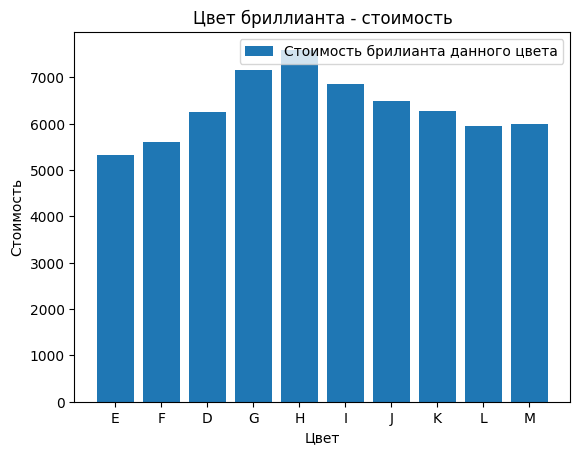

In [36]:
fig, ax1 = plt.subplots(nrows = 1, ncols = 1)

ax1.bar(x, y)
ax1.set_title("Цвет бриллианта - стоимость")
ax1.legend(["Стоимость брилианта данного цвета"])
ax1.set_xlabel("Цвет")
ax1.set_ylabel("Стоимость")

fig.show()

(2 балла) Постройте график `лабараторная оценка - кол-во бриллиантов`:

In [37]:
second_diamonds = diamonds.copy()
second_diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219703 entries, 0 to 219702
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         219703 non-null  int64  
 1   cut                219703 non-null  object 
 2   color              219703 non-null  object 
 3   clarity            219703 non-null  object 
 4   carat_weight       219703 non-null  float64
 5   cut_quality        219703 non-null  object 
 6   lab                219703 non-null  object 
 7   symmetry           219703 non-null  object 
 8   polish             219703 non-null  object 
 9   eye_clean          219703 non-null  object 
 10  depth_percent      219703 non-null  float64
 11  table_percent      219703 non-null  float64
 12  meas_length        219703 non-null  float64
 13  meas_width         219703 non-null  float64
 14  meas_depth         219703 non-null  float64
 15  girdle_min         219703 non-null  object 
 16  gi

In [38]:
second_diamonds.head()

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,62.7,59.0,2.85,2.87,1.79,M,M,200
1,1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,61.9,59.0,2.84,2.89,1.78,STK,STK,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,61.1,59.0,2.88,2.90,1.77,TN,M,200
3,3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,62.0,59.0,2.86,2.88,1.78,M,STK,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,64.9,58.5,2.79,2.83,1.82,STK,STK,200


In [39]:
x=[]
y=[]

for lab in dict(second_diamonds["lab"].value_counts()).keys():
  mask = second_diamonds[second_diamonds["lab"] == lab]
  print(f"{lab} - {mask.shape[0]}")
  if lab != "unknown":
    x.append(lab)
    y.append(mask.shape[0])

GIA - 200434
IGI - 15865
HRD - 3404


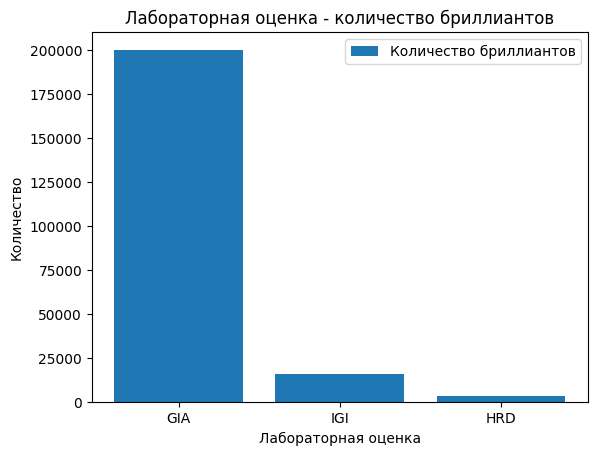

In [40]:
fig, ax1 = plt.subplots(nrows = 1, ncols = 1)

ax1.bar(x, y)
ax1.set_title("Лабораторная оценка - количество бриллиантов")
ax1.legend(["Количество бриллиантов"])
ax1.set_xlabel("Лабораторная оценка")
ax1.set_ylabel("Количество")

fig.show()

(2 балла) Постройте график `вес бриллианта - стоимость`:

In [41]:
third_diamonds = diamonds.copy()
third_diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219703 entries, 0 to 219702
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         219703 non-null  int64  
 1   cut                219703 non-null  object 
 2   color              219703 non-null  object 
 3   clarity            219703 non-null  object 
 4   carat_weight       219703 non-null  float64
 5   cut_quality        219703 non-null  object 
 6   lab                219703 non-null  object 
 7   symmetry           219703 non-null  object 
 8   polish             219703 non-null  object 
 9   eye_clean          219703 non-null  object 
 10  depth_percent      219703 non-null  float64
 11  table_percent      219703 non-null  float64
 12  meas_length        219703 non-null  float64
 13  meas_width         219703 non-null  float64
 14  meas_depth         219703 non-null  float64
 15  girdle_min         219703 non-null  object 
 16  gi

In [42]:
x=[]
y=[]

for i,row in third_diamonds.iterrows():
  x.append(row["carat_weight"])
  y.append(row["total_sales_price"])


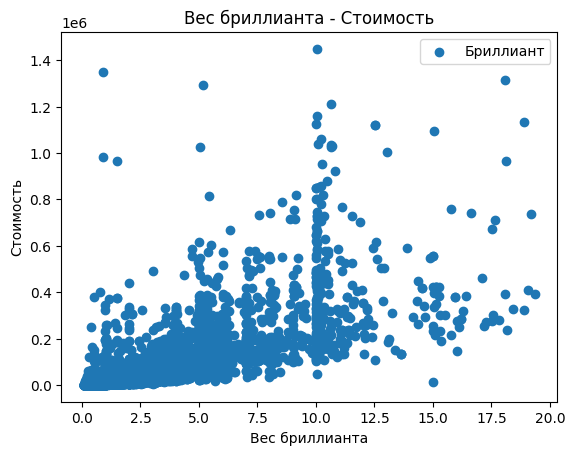

In [43]:
fig, ax1 = plt.subplots(nrows = 1, ncols = 1)

ax1.scatter(x, y)
ax1.set_title("Вес бриллианта - Стоимость")
ax1.legend(["Бриллиант"])
ax1.set_xlabel("Вес бриллианта")
ax1.set_ylabel("Стоимость")

fig.show()

(2 балла) Постройте график `система оценки GIA Cut - кол-во бриллиантов`:

In [44]:
forth_diamonds = diamonds.copy()
forth_diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219703 entries, 0 to 219702
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         219703 non-null  int64  
 1   cut                219703 non-null  object 
 2   color              219703 non-null  object 
 3   clarity            219703 non-null  object 
 4   carat_weight       219703 non-null  float64
 5   cut_quality        219703 non-null  object 
 6   lab                219703 non-null  object 
 7   symmetry           219703 non-null  object 
 8   polish             219703 non-null  object 
 9   eye_clean          219703 non-null  object 
 10  depth_percent      219703 non-null  float64
 11  table_percent      219703 non-null  float64
 12  meas_length        219703 non-null  float64
 13  meas_width         219703 non-null  float64
 14  meas_depth         219703 non-null  float64
 15  girdle_min         219703 non-null  object 
 16  gi

In [45]:
x=[]
y=[]

for cut in dict(forth_diamonds["cut"].value_counts()).keys():
  mask = forth_diamonds[forth_diamonds["cut"] == cut]
  print(f"{cut} - {mask.shape[0]}")
  if cut != "unknown":
    x.append(cut)
    y.append(mask.shape[0])

Round - 158316
Oval - 13857
Emerald - 11091
Pear - 9860
Princess - 7050
Radiant - 5630
Heart - 4774
Cushion Modified - 3984
Marquise - 2916
Asscher - 1696
Cushion - 529


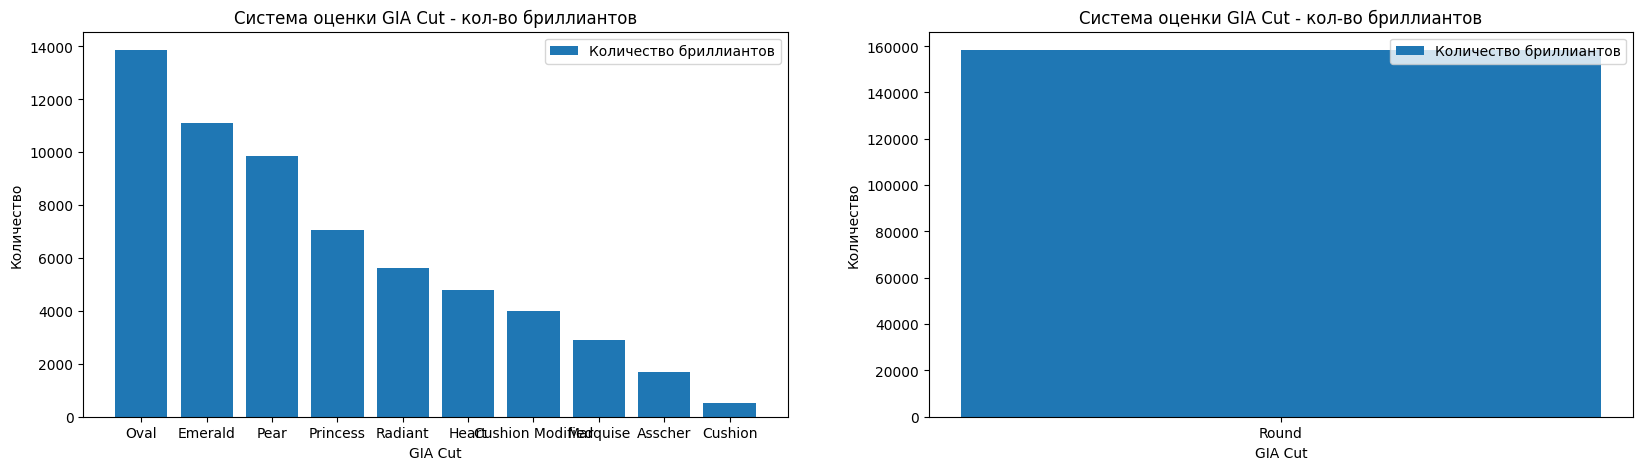

In [46]:
fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2,figsize=(20,5))

ax1.bar(x[1:], y[1:])
ax1.set_title("Система оценки GIA Cut - кол-во бриллиантов")
ax1.legend(["Количество бриллиантов"])
ax1.set_xlabel("GIA Cut")
ax1.set_ylabel("Количество")

ax2.bar(x[0], y[0])
ax2.set_title("Система оценки GIA Cut - кол-во бриллиантов")
ax2.legend(["Количество бриллиантов"])
ax2.set_xlabel("GIA Cut")
ax2.set_ylabel("Количество")

fig.show()

(2 балла) **Сделайте выводы по построенным графикам:**

>*Подсказка для маленьких: Что вы можете сказать о графиках полученных выше для данного датасета?*

По результатам построения графика, можно сделать вывод, что данные в датасете выбраны не равномерно. Присутствует большое количество выбросов, которые негативно скажутся на будущих моделях.

Сложно определить зависимость стоимости бриллианта от веса, очевидной зависимости не наблюдается.

Самый информативный график - Цвет бриллианта - стоимость. В нем распределение равномерное.

Для корректного обучения модели требуется разделить категориальные признаки OneHotEncodingом, а так же почистить датасет от выбросов и сделать примерно равным количество бриллиантов под каждый из признаков.

## Задание 3. Модель - 30 баллов

В данном задании вам предстоит построить классифицирующую модель размер алмаза и его стоимости, а затем оценить полученную модель.

>**Примечание**
>
>Данная модель не претендует на самый верный индикатор стоимости алмаза, ведь мы не учитываем ничего больше чем стоимость алмаза. Исключительно для образовательных целей :)

Для построения модели нам понадобится 4 столбца, а именно:
- `meas_length`
- `meas_width`
- `meas_depth`
- `total_sales_price`

От остальных столбцов можно избавиться.

(1 балл) Создайте новый датасет и выведите его первые 10 строк:

In [47]:
data = diamonds[["meas_length","meas_width","meas_depth","total_sales_price"]]
data.head(10)

,meas_length,meas_width,meas_depth,total_sales_price
0,2.85,2.87,1.79,200
1,2.84,2.89,1.78,200
2,2.88,2.90,1.77,200
3,2.86,2.88,1.78,200
4,2.79,2.83,1.82,200
5,2.95,2.99,1.81,200
6,2.85,2.88,1.84,200
7,2.86,2.89,1.78,200
8,2.89,2.92,1.85,200
9,2.83,2.87,1.80,200


(1 балл) Перемешайте строки в датафрейме случайным образом:

In [48]:
data = data.sample(frac = 1)
print(data.head())

        meas_length  meas_width  meas_depth  total_sales_price
68745          4.35        4.37        2.59               1064
177352         6.70        6.73        4.01               7842
97208          4.80        4.82        3.01               1548
161105         6.39        6.41        3.86               4839
47847          4.19        4.22        2.70                916


(1 балл) Сформируем новую колонку - для каждого бриллианта найдем сумму Минковского (p=3) по 3 измерениям бриллианта:

In [49]:
data["Summ"] = data["meas_length"] + data["meas_width"] + data["meas_depth"]

In [50]:
data.head()

,meas_length,meas_width,meas_depth,total_sales_price,Summ
68745,4.35,4.37,2.59,1064,11.31
177352,6.70,6.73,4.01,7842,17.44
97208,4.80,4.82,3.01,1548,12.63
161105,6.39,6.41,3.86,4839,16.66
47847,4.19,4.22,2.70,916,11.11


(1 балл) Сформируем новый датасет из двух колонок - сумма Минковского и `total_sales_price`:

In [51]:
data

,meas_length,meas_width,meas_depth,total_sales_price,Summ
68745,4.35,4.37,2.59,1064,11.31
177352,6.70,6.73,4.01,7842,17.44
97208,4.80,4.82,3.01,1548,12.63
161105,6.39,6.41,3.86,4839,16.66
47847,4.19,4.22,2.70,916,11.11
...,...,...,...,...,...
195533,8.37,5.01,3.24,13104,16.62
71181,4.68,4.71,2.90,1060,12.29
205074,11.16,6.78,3.81,19046,21.75
106197,5.18,4.04,2.75,1796,11.97


In [52]:
result = data[["total_sales_price","Summ"]]
data = data.drop(["total_sales_price"],axis = 1)
data = data.drop(["Summ"], axis = 1)
data

,meas_length,meas_width,meas_depth
68745,4.35,4.37,2.59
177352,6.70,6.73,4.01
97208,4.80,4.82,3.01
161105,6.39,6.41,3.86
47847,4.19,4.22,2.70
...,...,...,...
195533,8.37,5.01,3.24
71181,4.68,4.71,2.90
205074,11.16,6.78,3.81
106197,5.18,4.04,2.75


(1 балл) Разделите вашу выборку на две части в соотношении 8:2 - одна выборка будет для тренировка, а другая для тестов вашей модели:

In [53]:
X_train, X_test, y_train, y_test = train_test_split(data, result, test_size=2/8, random_state=42)

(2 балла) Постройте график зависимости стоимости от вашего нового параметра размера для тренинг-выборки:

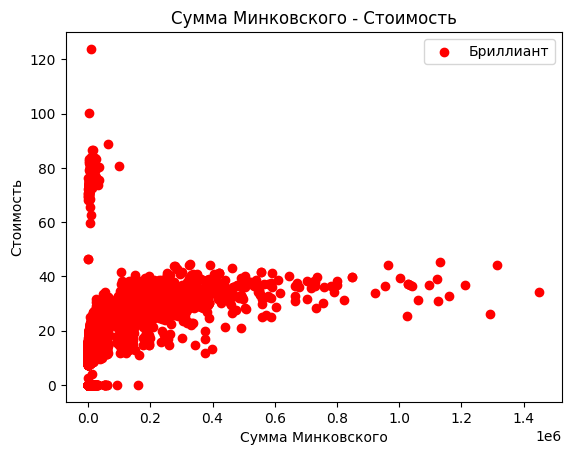

In [54]:
x = y_train['total_sales_price']
y = y_train['Summ']


fig, ax1 = plt.subplots(nrows = 1, ncols = 1)

ax1.scatter(x, y, color = "red")
ax1.set_title("Сумма Минковского - Стоимость")
ax1.legend(["Бриллиант"])
ax1.set_xlabel("Сумма Минковского")
ax1.set_ylabel("Стоимость")

fig.show()

(2 балла) Нанесите на тот же график тестовую выборку, используя другой цвет (не забудьте про параметр прозрачности):

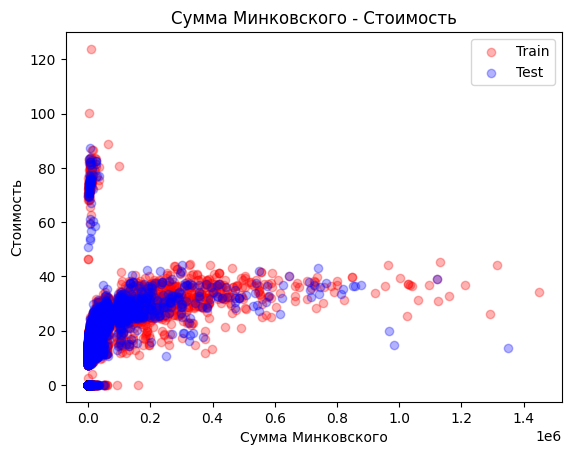

In [55]:
fig, ax1 = plt.subplots(nrows = 1, ncols = 1)

x = y_train['total_sales_price']
y = y_train['Summ']

ax1.scatter(x, y, color = (1, 0, 0, 0.3))
ax1.set_title("Сумма Минковского - Стоимость")
ax1.set_xlabel("Сумма Минковского")
ax1.set_ylabel("Стоимость")

x = y_test['total_sales_price']
y = y_test['Summ']

ax1.scatter(x, y, color = (0, 0, 1, 0.3))
ax1.legend(["Train","Test"])

fig.show()

(3 балла) Найдите для каждой бриллианта из тестовой выборки его "ближайшего соседа" из тренинг-выборки. Для каждого бриллианта из тестовой выборки найдите расстояния до соответствующего ближайшего соседа:

In [56]:
from sklearn.neighbors import KNeighborsRegressor

kNN = KNeighborsRegressor(n_neighbors=1)
kNN.fit(X_train, y_train)
knn_result = kNN.predict(X_test)
y_test = np.array(y_test)
ans = []
for i,result in enumerate(y_test):
  ans.append(abs(y_test[i][0] - knn_result[i][0]) / y_test[i][0])

In [57]:
X_train = np.array(X_train)
y_train = np.array(y_train)

X_test = np.array(X_test)
y_test = np.array(y_test)

size = 1000

X_train = X_train[:size]
y_train = y_train[:size]

X_test = X_test[:size]
y_test = y_test[:size]

my_result = []
print(len(X_train))

for i,item in enumerate(X_test):
  error = 1e10
  index = -1
  for j,row in enumerate(X_train):
    new_error = (row[0] - item[0])**2 + (row[1] - item[1])**2 + (row[2] - item[2])**2

    if new_error < error:
      error = new_error
      index = j


  my_result.append(y_train[index][0])


1000


In [58]:
my_ans = []
for i,result in enumerate(y_test):
  abc = abs(y_test[i][0] - my_result[i]) / y_test[i][0]
  my_ans.append(abc)

(3 балла) Найдите насколько сильно (в процентах) отличается цена бриллиантов из тестовой выборки от их соответствующих ближайших соседей:

In [59]:
print(f"Готовая модель: {sum(ans)/len(ans)}")
print(f"Моя модель: {sum(my_ans)/len(ans)}")

Готовая модель: 0.4334501568510021
Моя модель: 0.007054126089126137


**Данная модель является выдумкой автора. Не важен коэффициент ошибки, важны ваши шаги для получения коэффициента.**

### Введение в машинное обучение

Теперь давайте познакомимся с таким сильным инструментом как `sklearn`.

Вам необходимо:
1. выбрать 2 категориальных признака
2. на их основе обучить решающее дерево
3. оценить среднеквадратичную ошибку цены бриллианта
4. сделать пп. 1-3 и выбрать ту пару, которая дает лучший результат
5. сделать выводы

(3 балла) Мы работаем с категориальными признаками, для них не понятно что есть "больше" и "меньше". Поэтому нам нужно предварительно закодировать значения наших признаков, с чем нам поможет [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html):

In [60]:
#dt - dataset
dt = diamonds[["cut", "color", 'clarity', "cut_quality", 'lab', "symmetry", "polish", "eye_clean", "girdle_min", "girdle_max"]]
dt_answer = diamonds["total_sales_price"]
print(dt["eye_clean"].value_counts())
dt = dt.drop("eye_clean", axis = 1)

eye_clean
unknown       156916
Yes            61931
Borderline       515
E1               300
No                41
Name: count, dtype: int64


In [61]:
dt

,cut,color,clarity,cut_quality,lab,symmetry,polish,girdle_min,girdle_max
0,Round,E,VVS2,Excellent,IGI,Very Good,Very Good,M,M
1,Round,E,VVS2,Very Good,IGI,Very Good,Very Good,STK,STK
2,Round,E,VVS2,Excellent,IGI,Very Good,Very Good,TN,M
3,Round,E,VVS2,Excellent,IGI,Very Good,Very Good,M,STK
4,Round,E,VVS2,Very Good,IGI,Very Good,Excellent,STK,STK
...,...,...,...,...,...,...,...,...,...
219698,Round,E,VS1,Excellent,GIA,Excellent,Excellent,M,STK
219699,Radiant,unknown,VS2,unknown,GIA,Very Good,Very Good,TK,XTK
219700,Round,E,VS1,Excellent,GIA,Excellent,Excellent,TN,M
219701,Princess,unknown,SI2,unknown,GIA,Good,Good,XTN,VTK


In [62]:
dt = pd.DataFrame(OneHotEncoder(sparse=False).fit_transform(dt))
dt

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,0,1,2,3,4,5,6,7,8,9,...,62,63,64,65,66,67,68,69,70,71
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219698,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
219699,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
219700,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
219701,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [63]:
dt.shape

(219703, 72)

In [64]:
dt_answer

0             200
1             200
2             200
3             200
4             200
           ...   
219698    1210692
219699    1292500
219700    1315496
219701    1350000
219702    1449881
Name: total_sales_price, Length: 219703, dtype: int64

(3 балла) Разбейте датасет на обучающую и тестовую выбору. Для этого вам поможет [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html):

In [65]:
X_train, X_test, y_train, y_test = train_test_split(dt, dt_answer, test_size=2/8, random_state=42)

(3 балла) Затем создайте и обучите вашу модель - [DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html):

In [66]:

model = skl.tree.DecisionTreeRegressor(max_depth = 10)

In [67]:
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10)

In [68]:
pred = model.predict(X_test)

(3 балла) Оцените ошибку вашей модели при помощи [mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html):

In [69]:
skl.metrics.mean_squared_error(y_test, pred)

810519431.8285595

In [75]:
dt = diamonds[["cut", "color", 'clarity', "cut_quality", 'lab', "symmetry", "polish", "eye_clean", "girdle_min", "girdle_max"]]
dt_answer = diamonds["total_sales_price"]
dt = dt.drop("eye_clean", axis = 1)
best_col1 = 0
best_col2 = 0

best = 1000000000000000000
for col1 in list(dt.columns.values):
  for col2 in list(dt.columns.values):
    if col1 != col2:
      new_dt = pd.DataFrame(OneHotEncoder(sparse=False).fit_transform(dt[[col1,col2]]))
      X_train, X_test, y_train, y_test = train_test_split(new_dt, dt_answer, test_size=2/8, random_state=42)
      model = skl.tree.DecisionTreeRegressor(max_depth = 50)
      model.fit(X_train, y_train)
      pred = model.predict(X_test)
      res = skl.metrics.mean_squared_error(y_test, pred)
      print(f"The result of {col1} and {col2} is {res}")
      if res < best:
        best = res
        best_col1 = col1
        best_col2 = col2

print(f"Best: {best} when {best_col1} and {best_col2}")

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


The result of cut and color is 786108199.1075953


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


The result of cut and clarity is 790047904.9151583


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


The result of cut and cut_quality is 790788613.2202373


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


The result of cut and lab is 788016202.9944185


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


The result of cut and symmetry is 784828360.3429666


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


The result of cut and polish is 789047350.2085108


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


The result of cut and girdle_min is 789570609.4583896


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


The result of cut and girdle_max is 788737664.4358858


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


The result of color and cut is 786108199.1075953


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


The result of color and clarity is 793914743.9070451


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


The result of color and cut_quality is 791442738.682674


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


The result of color and lab is 792914512.6071411


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


The result of color and symmetry is 796332822.1680868


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


The result of color and polish is 795872449.4632999


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


The result of color and girdle_min is 792790783.3232285


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


The result of color and girdle_max is 795116426.1955546


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


The result of clarity and cut is 790047904.9151583


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


The result of clarity and color is 793914743.9070451


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


The result of clarity and cut_quality is 793589907.5858759


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


The result of clarity and lab is 799966196.625271


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


The result of clarity and symmetry is 798597395.5993356


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


The result of clarity and polish is 802604537.6976621


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


The result of clarity and girdle_min is 797325887.54314


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


The result of clarity and girdle_max is 797505670.9466742


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


The result of cut_quality and cut is 790788613.2202373


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


The result of cut_quality and color is 791442738.682674


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


The result of cut_quality and clarity is 793589886.3365319
The result of cut_quality and lab is 791726247.6974243


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


The result of cut_quality and symmetry is 789539578.3293369


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


The result of cut_quality and polish is 794109914.5476778


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


The result of cut_quality and girdle_min is 793110856.2456399


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


The result of cut_quality and girdle_max is 791932831.2300512


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


The result of lab and cut is 788016202.9944185


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


The result of lab and color is 792914512.6071411


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


The result of lab and clarity is 799966196.625271
The result of lab and cut_quality is 791726247.6974243


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


The result of lab and symmetry is 796793158.0057745
The result of lab and polish is 799431382.4485927


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


The result of lab and girdle_min is 795749253.3740915


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


The result of lab and girdle_max is 796138943.1157757


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


The result of symmetry and cut is 784828360.3429666


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


The result of symmetry and color is 796332822.1680868


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


The result of symmetry and clarity is 798597395.5993356


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


The result of symmetry and cut_quality is 789539578.3293369
The result of symmetry and lab is 796793158.0057745


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


The result of symmetry and polish is 800358044.039553


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


The result of symmetry and girdle_min is 795144246.357694


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


The result of symmetry and girdle_max is 795866357.3739321


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


The result of polish and cut is 789047350.2085108


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


The result of polish and color is 795872449.4632999


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


The result of polish and clarity is 802604537.6976621


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


The result of polish and cut_quality is 794109914.5476778
The result of polish and lab is 799431382.4485927


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


The result of polish and symmetry is 800358044.039553


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


The result of polish and girdle_min is 798775366.1925856


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


The result of polish and girdle_max is 797943641.8522981


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


The result of girdle_min and cut is 789570240.4340296


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


The result of girdle_min and color is 792790783.3232285


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


The result of girdle_min and clarity is 797325786.886857


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


The result of girdle_min and cut_quality is 793110856.2456399


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


The result of girdle_min and lab is 795749253.3740915


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


The result of girdle_min and symmetry is 795144246.357694


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


The result of girdle_min and polish is 798775366.1925856


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


The result of girdle_min and girdle_max is 795706991.4428865


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


The result of girdle_max and cut is 788737198.0918717


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


The result of girdle_max and color is 795116426.1955546


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


The result of girdle_max and clarity is 797505670.9466742


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


The result of girdle_max and cut_quality is 791932831.2300512


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


The result of girdle_max and lab is 796138943.1157757


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


The result of girdle_max and symmetry is 795866357.3739321


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


The result of girdle_max and polish is 797943641.8522981


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


The result of girdle_max and girdle_min is 795706991.4428865
Best: 784828360.3429666 when cut and symmetry


(3 балла) **Сделайте выводы какие категориальные признаки лучше:**

*Подсказки для маленьких: Что вы можете сказать о зависимости по вашей выборке признаков? Какой вы можете сделать вывод об готовых инструментах для работы и написанных Вами?*

ЛУчше всего бриллианты описываюи признаки огранка и симметрия. Если использовать данные параметры для обучения модели, то получается наиболее хороший результат. Но в любом случае, результат получается плохим, потому что не учитываются другие параметры, которые так же сильно влияют на стоимость бриллианта(не категориальные). Для наиболее хорошей оценки необходимо использовать полный датасет, OneHotEncodить все категориальные параметры и увеличивать максимальную глубину дерева